<a href="https://colab.research.google.com/github/abdala9512/fake-news-poc/blob/main/AnalisisExploratorio_Modelos_FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis exploratorio 1

#### Librerias

In [1]:
#pip install unidecode
# Install DVC
#!pip install dvc &> /dev/null 

# Import DVC package - relevant only when working in a Colab environment
#import dvc

# Initilize DVC in the local directory
#!dvc init &> /dev/null 

# Track the changes with git
#!git add .dvc .dvcignore .gitignore
#!git commit -m "Initialize DVC"

In [2]:
# NLKT
import nltk
nltk.download('all')
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [3]:
#!pip install unidecode
#!pip install emoji
#!pip install emoji==0.6.0 hay que instalar esta version para que funcione
#!pip install pyLDAvis

In [4]:
# Modulos nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import ConditionalFreqDist
# Otras librerias
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import chardet
import unidecode
import statistics
import shutil
#import emoji
import os
import codecs
import math
import seaborn as sns
# Analisis de topicos
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


In [5]:
# Stopwords
stop_words = set(stopwords.words(['spanish','english'])) 
others_stop_words = ['estan', 'tambien', 'si','embargo','aun','traves','ademas','mas', 'segun','aunque', 'parte', 'asi']

stop_words.update(others_stop_words)
print(stop_words)

{'ni', 'isn', 'nuestros', "aren't", 'siente', 'serían', 'para', 'to', 'but', 'donde', 'su', 'en', 'el', "weren't", 'estuviera', 'teniendo', 'seamos', 'tuviesen', 'tenemos', 'seremos', 'habremos', 'habían', 'sois', 'más', 'esos', 'tuvieras', 'yourselves', 'which', 'sentido', 'on', 'estuvieran', 'hubimos', 'an', 'tengan', 'había', 'again', 'through', 'muchos', 'por', 'are', 'my', 'were', 'by', 'es', 'son', 'sentid', 'hasn', 'este', 'hubieseis', 'tendréis', 'estuvieras', 'también', 'estar', 'traves', 'estarán', 'ours', 'tambien', "you'll", "needn't", 'serás', "mightn't", 's', 'tendrá', 'entre', 'estés', 'habré', 'under', 'quienes', 'down', 'habéis', 'hube', 'esa', 'ellos', 'uno', 'habrías', 'tendrías', 'during', "mustn't", 'hayan', 'fueron', 'i', 'estaría', 'tenido', 'off', "you'd", 'this', 'estadas', 'os', 'soy', 'in', 'cuando', 'qué', 'ademas', 'tuyo', 'out', 'éramos', 'estado', 'had', 'tendrás', 'fueseis', 'estáis', 'parte', 'they', 'does', 'shan', 'estuvieseis', 'a', 'll', 'fuisteis',

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Importar datos

In [6]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Rutas
root_true = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/Veridicas'
root_fake = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/Falsas'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Renombrar los archivos

In [8]:
def rename_files(root, new_path):
    if not os.path.exists(new_path):
        os.mkdir(new_path)

    for idx, filename in enumerate(os.listdir(root)):
        if filename.endswith('.txt'):
            new_name = re.sub(r'[^\w\s]', '', filename.split('.')[0])
            new_name = str(idx+1) + '_' + new_name + '.txt' 
            shutil.copy(os.path.join(root, filename), os.path.join(new_path, new_name))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
path_fake_rename = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/FalsasRename'
#rename_files(root = root_fake, new_path = path_fake_rename)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
path_true_rename = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/VeridicasRename'
#rename_files(root = root_true, new_path = path_true_rename)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Carga de archivos renombrados

#### Noticias falsas

In [11]:
# Noticias falsas
fakeCorpus = PlaintextCorpusReader(path_fake_rename, '.*')
fake_news =list(set(fakeCorpus.fileids()))

# Carga de archivos
fake_docs_raw = []

# lectura 
for file in fake_news:
    with open(path_fake_rename+'/'+file, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    
    try:
        fake_list = PlaintextCorpusReader(path_fake_rename, file, encoding=encoding)
        fake_docs_raw.append(fake_list.raw(file))
    except UnicodeDecodeError:
        print(f"Error: unable to decode {file} with encoding {encoding}")

# cantidad de noticias
print("Cantidad de noticias falsas: " , len(fake_docs_raw))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Error: unable to decode 171_F Mensaje desinforma sobre restricciones en varios paises por cuarta ola de COVID19.txt with encoding Windows-1254
Error: unable to decode 63_F Escandalo por comercializacion de vacuna Pfizer contra COVID sin estudio de contagio es desinformacion.txt with encoding Windows-1254
Error: unable to decode 73_F EL DIOXIDO DE CLORO NO CURA LA COVID19 COMO RECOMIENDA LA MODELO COLOMBIANA NATALIA PARIS.txt with encoding Windows-1254
Error: unable to decode 259_FNo este pantallazo no prueba que Tribunal de Colombia ordeno suspender el plan de vacunacion.txt with encoding Windows-1254
Cantidad de noticias falsas:  291


#### Noticias veridicas

In [12]:
# Noticias veridicas
trueCorpus = PlaintextCorpusReader(path_true_rename, '.*')
true_news =list(set(trueCorpus.fileids())) 

# Carga de archivos
true_docs_raw = []

# lectura 
for file in true_news:
    with open(path_true_rename+'/'+file, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    
    try:
        true_list = PlaintextCorpusReader(path_true_rename, file, encoding=encoding)
        true_docs_raw.append(true_list.raw(file))
    except UnicodeDecodeError:
        print(f"Error: unable to decode {file} with encoding {encoding}")

# cantidad de noticias
print("Cantidad de noticias veridicas: " , len(true_docs_raw))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cantidad de noticias veridicas:  237


# Funciones

In [13]:
def generate_categorical_boxplot(df, categorical_col, numerical_col, title, xlabel, ylabel):
    sns.set_palette("pastel")

    # boxplot
    ax = sns.boxplot(data=df,x=categorical_col, y=numerical_col)
    stats = df.groupby(categorical_col)[numerical_col].describe()
    
    for i, category in enumerate(df[categorical_col].unique()):
      stats_row = stats.loc[category]
      ax.text(x=i, y=stats_row['min'], s=round(stats_row['min'], 3), ha='center', va='top')
      ax.text(x=i, y=stats_row['25%'], s=round(stats_row['25%'], 3), ha='center', va='top')
      ax.text(x=i, y=stats_row['50%'], s=round(stats_row['50%'], 3), ha='center', va='top')
      ax.text(x=i, y=stats_row['75%'], s=round(stats_row['75%'], 3), ha='center', va='bottom')
      ax.text(x=i, y=stats_row['max'], s=round(stats_row['max'], 3), ha='center', va='bottom')
  
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def plot_lexical_diversity_dist(docs):
  '''
  docs: listado con documentos (textos) a los cuales se les calculara la diversidad lexica
  '''
  diversidades = []
  for text in docs:
    # limpieza
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    # calculo
    tokens = nltk.word_tokenize(text.lower())
    frecuencias = FreqDist(tokens)
    if len(tokens) > 0:
      diversidad_lexica = len(frecuencias) / len(tokens)
      diversidades.append(diversidad_lexica)
  plt.hist(diversidades)
  plt.title("*Distribución de la diversidad léxica*" + " - " "Diversidad lexica media: " + str(round(sum(diversidades) / len(diversidades),4)) + " - " + "Desviación : " + str(round(statistics.stdev(diversidades),4)))
  plt.xlabel("Diversidad léxica")
  plt.ylabel("Frecuencia")
  
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def plot_tokens_text(docs):
  '''
  docs: listado con documentos (textos) a los cuales se les calculara el número de tokens
  '''
  num_tokens = []
  num_tokens_unicos = []
  
  for text in docs:
    # limpieza
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    # calculo
    tokens = nltk.word_tokenize(text.lower())
    tokens = [w for w in tokens if not w in stopwords.words('spanish') and not w in string.punctuation]
    frecuencias = FreqDist(tokens)
    num_tokens.append(len(tokens))
    num_tokens_unicos.append(len(frecuencias))
    
  # Gráfico
  plt.figure(figsize=(10,5))
  plt.hist(num_tokens, alpha=0.5, label='Número de Tokens')
  plt.hist(num_tokens_unicos, alpha=0.5, label='Número de Tokens Únicos')
  plt.title("*Distribución de número de tokens y número de tokens únicos por texto*")
  plt.xlabel("Cantidad de tokens")
  plt.ylabel("Frecuencia")
  plt.legend(loc='upper right')
  plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
def process_text(textCorpus,nameText, nFQ, nL):
    '''
    Esta función permite procesar el texto y permite obtener algunas estadísticas de interes asociadas al texto procesado.
    text: Nombre del texto a procesar.
    nFQ: Número de tokens más frecuentes a obtener.
    nL: logitud para determinar palabras más largas
    '''
    # Se obtiene el texto de objeto Corpus
    name = nameText
    raw_text = textCorpus.raw(nameText)

    #0. Limpieza del texto 
    special_chars = ['¡', '!', '¿', '?', '\\', '-', '»', '[', ']', '«', '•', '<', '>', '(', ')', '/', '&', '$', '"', '“', '”',"'",'‘']
    raw_text = raw_text.lower() #minuscula
    raw_text_clean = raw_text.translate(str.maketrans('', '', string.punctuation)) # Eliminar puntuación del texto
    
    
    for char in special_chars:
      raw_text_clean = raw_text_clean.replace(char, '')
    raw_text_clean_acentos = unidecode.unidecode(raw_text_clean) #acentos

    # 1. Tokenización
    tokens_doc = nltk.word_tokenize(raw_text_clean.lower()) # Tokenizar el texto

    # 2. Limpieza de tokens
    
    stop_words = set(stopwords.words(['spanish','english'])) 
    others_stop_words = ['estan', 'tambien', 'si','embargo','aun','traves','ademas','mas', 'segun','aunque', 'parte', 'asi']
    stop_words.update(others_stop_words)
    
    tokens_sw = [token for token in tokens_doc if not token in list(stop_words)] # Seleccionar los tokens que no son stopwords
    table = str.maketrans('', '', string.punctuation) # Eliminar de los tokens la puntuación parte 1
    tokens = [w.translate(table) for w in tokens_sw] # Eliminar de los tokens la puntuación parte 2
    tokens = [unidecode.unidecode(token) for token in tokens] # Eliminar de los tokens los acentos
    tokens = [re.sub('[¡!¿?\\-»()[]«“”•"<>]“”‘\'’]', '', token) for token in tokens] # Eliminar caracteres especiales
    tokens = [token.strip() for token in tokens] # Eliminar tokens vacios parte 1
    tokens = [token for token in tokens if token != ''] # Eliminar tokens vacios parte 2
    tokens = [token for token in tokens if not token.isdigit()] # Eliminar tokens numericos
    

    # 3. Cálculo de estadísticas

    # Oraciones y tokens
    num_sent = len(textCorpus.sents(nameText)) # Extrae en una lista las oraciones del texto, luego calcula el número de oraciones
    len_news = len(textCorpus.words(nameText)[:]) # logitud del texto
    
    # Oraciones y tokens promedio
    if len(textCorpus.paras(nameText)) > 0:
      mean_sent_para = sum(len(p) for p in textCorpus.paras(nameText)) / float(len(textCorpus.paras(nameText))) #suma(numero oraciones en los parrafos)/(numero de parrafos en el texto)
      mean_tokens_sent = sum(len(s) for s in textCorpus.sents(nameText)) / float(len(textCorpus.sents(nameText))) #suma(numero de tokens por oracion)/(numero de oraciones)
    else: 
      mean_sent_para = 0
      mean_tokens_sent = 0

    # Número de tokens sin stopwords
    num_tokens_ws = len(tokens_sw) # el numero de tokens se calcula sobre el total de tokens en el texto

    # Número de tokens únicos sin stopwords
    num_tokens_unique_ws = len(set(tokens_sw)) # el numero tokens unicos se calcula sobre el total de tokens limpios 

    # Número de stopwords
    num_stopwords = len_news - len(tokens_sw) # numero de stopwords 

    # Diversidad léxica
    if len(tokens_sw) >0:
      lexical_diversity = len(set(tokens_sw))/len(tokens_sw)
    else: 
      lexical_diversity = 0

    # Entropia
    token_counts = Counter(tokens_doc)
    token_freqs = [count / len(tokens_doc) for count in token_counts.values()]
    entropy = -sum(freq * math.log2(freq) for freq in token_freqs)

    # 4. tokens de mayor frecuencia
    freq_dist = FreqDist(tokens) 
    most_common = freq_dist.most_common(nFQ)
    most_common_tokens = [token[0] for token in most_common]
    num_most_common = len(most_common_tokens)

    # 5. Hapax
    hapaxes = freq_dist.hapaxes()
    num_hapaxes = len(hapaxes)

    # 6. Palabras largas
    long_words = [w for w in freq_dist if len(w) >= nL]
    num_long_word = len(long_words)

    # 7. Referencias a otros sitios
    pattern1 = r'(https?://)?(www\.)?(\w+\.)+[a-zA-Z]{2,}(/\S+)*'
    pattern2 = r'(https?://)?(www\.)?([a-zA-Z0-9-]+\.)+[a-zA-Z]{2,}(/\S+)*'
    pattern3 = r'(https?://)?(www\.)?([a-zA-Z0-9]+\.)+[a-zA-Z]{2,}(/\S+)*'
    pattern4 = r'(https?://)?(www\.)?([a-zA-Z0-9]+\.)+[a-zA-Z]{2,3}(/\S+)*'
    pattern5 = r'(https?://)?(www\.)?([a-zA-Z]+\.)+[a-zA-Z]{2,3}(/\S+)*'
    pattern6 =  r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    websites = re.findall(pattern1, raw_text) + re.findall(pattern2, raw_text) + re.findall(pattern3, raw_text) + re.findall(pattern4, raw_text) + re.findall(pattern5, raw_text)+ re.findall(pattern6, raw_text)
    numwebsites = len(websites)

    # # 8. Emojis
    # patron_emoji = re.compile(emoji.get_emoji_regexp())
    # emojis = patron_emoji.findall(raw_text)
    # numemojis = len(emojis) emojis,numemojis,

    return name,len_news,mean_sent_para,mean_tokens_sent, num_tokens_ws, num_tokens_unique_ws, num_stopwords, lexical_diversity,entropy, most_common_tokens,num_most_common, hapaxes,num_hapaxes, long_words,num_long_word, websites,numwebsites,  raw_text_clean_acentos

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
tilde = lambda str: str.translate(str.maketrans("áàäéèëíìïòóöùúüÀÁÄÈÉËÌÍÏÒÓÖÙÚÜ", "aaaeeeiiiooouuuAAAEEEIIIOOOUUU"))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
def tf_idf_prep(textCorpus,nameText, stemmer=None):
    '''
    text: texto a preparar
    stemmer: metodo de stemming, recibe ps = 'PorterStemmer', ss = 'SnowballStemmer'
    '''

    name = nameText
    raw_text = textCorpus.raw(nameText)

    # 0. Limpiar texto
    #if isinstance(text, bytes):
    #    text = text.decode('utf-8')
  
    raw_text = raw_text.translate(str.maketrans('', '', string.punctuation)) # Eliminar puntuación
    text = re.sub('[¡!¿?\\-»()[]«“”•]', '', raw_text) # Eliminar algunos caracteres especiales que se identifican en el texto

    # 1. Tokenizar
    tokens = word_tokenize(tilde(text.lower()))

    # 2. Eliminar puntuación
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]

    # 3. Segunda limpieza
    tokens = [re.sub('“|”|[|¡|!|¿|?|\|\|-|»|(|)|[|]|«|“|”|•|]', '',token) for token in tokens] # eliminar caracteres especiales
    tokens = [token.strip() for token in tokens] # eliminar espacio en blanco en los tokens
    tokens = [token for token in tokens if token != '']  # eliminar tokens vacios
    tokens = [token for token in tokens if not token.isdigit()] # eliminar tokens numericos

    # 4. Eliminar stopwords
    stop_words = set(stopwords.words(['spanish', 'english']))
    tokens = [w for w in tokens if not w in stop_words]

    # 5. Stemizar
    if stemmer == 'ps':
        stemmer = PorterStemmer()
    elif stemmer == 'ss':
        stemmer = SnowballStemmer('spanish')
    else:
        return tokens
    tokens_docs_stem = [stemmer.stem(w) for w in tokens]

    return tokens_docs_stem

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:25: DeprecationWarning: invalid escape sequence \|
<>:25: DeprecationWarning: invalid escape sequence \|
<ipython-input-18-190f62b31aee>:25: DeprecationWarning: invalid escape sequence \|
  tokens = [re.sub('“|”|[|¡|!|¿|?|\|\|-|»|(|)|[|]|«|“|”|•|]', '',token) for token in tokens] # eliminar caracteres especiales


In [19]:
def cosine_similarity(a, b):
    nom = np.sum(np.multiply(a, b))
    denom = np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b)))
    sim = nom / denom
    return sim

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Resumen

#### Fakenews

In [20]:
fake_data = []

for nameText in fake_news:
    name,len_news,mean_sent_para,mean_tokens_sent, num_tokens_ws, num_tokens_unique_ws, num_stopwords, lexical_diversity,entropy, most_common_tokens,num_most_common, hapaxes,num_hapaxes, long_words,num_long_word, websites,numwebsites, raw_text_clean_acentos = process_text(textCorpus = fakeCorpus,nameText = nameText , nFQ = 10, nL = 13)
    fake_data.append([name,len_news,mean_sent_para,mean_tokens_sent, num_tokens_ws, num_tokens_unique_ws, num_stopwords, lexical_diversity,entropy, most_common_tokens,num_most_common, hapaxes,num_hapaxes, long_words,num_long_word, websites,numwebsites, raw_text_clean_acentos])

fakedf = pd.DataFrame(fake_data, 
                      columns=["Archivo","LongitudNoticia","OracionesPromedioParrafo","TokensPromedioOracion", "NumTokensWS", 
                               "NumTokensUnicosWS","NumStopW", "DiversidadLexica", "Entropia","TokensMayorFrecuencia","NumTokensMayorF", 
                               "Hapaxes","NumHapaxes" ,"PalabrasLargas","NumPalabrasLargas", "WebSites","NumWebSites", "Texto"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
fakedf["Numero"] = fakedf["Archivo"].str.extract('(\d+)', expand=False).astype(int)
fakedf = fakedf.sort_values(by = 'Numero', ascending = True)
fakedf["Tipo"] = "Falsa"
fakedf

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-21-9c8048921cad>:1: DeprecationWarning: invalid escape sequence \d
  fakedf["Numero"] = fakedf["Archivo"].str.extract('(\d+)', expand=False).astype(int)


Archivo  LongitudNoticia  \
52   1_F Las afirmaciones falsas de Arturo Vinuesa ...             1453   
10   2_F Las afirmaciones falsas de la imagen que d...             3397   
242  3_F La vitamina C D y el zinc no disminuyen la...              579   
278                  4_F La vacuna alterara mi ADN.txt             1955   
254  5_F La OMS desaconseja el uso de plasma de pac...              515   
..                                                 ...              ...   
279  292_FLas afirmaciones falsas del video de Rica...             2623   
54   293_FLa Reina Isabel no tomo ivermectina como ...              527   
188  294_FLa OMS desaconseja el uso de fluvoxamina ...              604   
115  295_FIndia no acuso a Soumya Swaminathan cient...             1077   
282  296_FGobierno no ha aprobado despidos colectiv...              676   

     OracionesPromedioParrafo  TokensPromedioOracion  NumTokensWS  \
52                   2.611111              30.914894          617   
10                   2.023256              39.045977         1493   
242                  1.900000              30.473684          237   
278                  2.520000              31.031746          817   
254                  1.090909              42.916667          242   
..                        ...                    ...          ...   
279                  2.666667              32.787500         1136   
54                   1.750000              37.642857          239   
188                  1.250000              40.266667          279   
115                  2.142857              35.900000          455   
282                  1.500000              45.066667          326   

     NumTokensUnicosWS  NumStopW  DiversidadLexica  Entropia  \
52                 387       836          0.627229  7.576865   
10                 821      1904          0.549900  8.169462   
242                165       342          0.696203  6.942675   
278                550      1138          0.673195  7.927036   
254                179       273          0.739669  6.838551   
..                 ...       ...               ...       ...   
279                610      1487          0.536972  7.832724   
54                 161       288          0.673640  6.850275   
188                176       325          0.630824  6.852664   
115                302       622          0.663736  7.231671   
282                235       350          0.720859  7.195517   

                                 TokensMayorFrecuencia  NumTokensMayorF  \
52   [covid19, coronavirus, muertes, virus, gripe, ...               10   
10   [vacunas, vacuna, ninos, covid19, efectos, vac...               10   
242  [vitamina, suplementos, covid19, c, investigad...               10   
278  [virus, vacuna, vacunas, adn, ahora, genetica,...               10   
254  [pacientes, plasma, graves, uso, covid19, expe...               10   
..                                                 ...              ...   
279  [grafeno, oxido, covid19, delgado, video, 5g, ...               10   
54   [ivermectina, reina, isabel, covid19, tratamie...               10   
188  [covid19, pacientes, uso, fluvoxamina, colchic...               10   
115  [oms, abogados, india, ivermectina, cientifica...               10   
282  [ministerio, trabajo, laboral, resolucion, emp...               10   

                                               Hapaxes  NumHapaxes  \
52   [consultado, circula, agosto, familia, especia...         276   
10   [frase, encabeza, infertilidad, nino, sufra, c...         511   
242  [disminuyen, covid, apuntan, protegen, refuerz...         132   
278  [alterara, resuelve, demostrado, efectivas, ba...         396   
254  [oms, tratar, senala, mejora, tampoco, grupo, ...         140   
..                                                 ...         ...   
279  [compartiendo, fundador, quinta, columna, cana...         416   
54   [llevo, creer, dado, circula, redes, sociales,...         124   
188  [dos, justif

In [22]:
#fakedf[(fakedf.NumEmojis>0) | (fakedf.NumWebSites>0) ]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Truenews

In [23]:
true_data = []

for nameText in true_news:
    name,len_news,mean_sent_para,mean_tokens_sent, num_tokens_ws, num_tokens_unique_ws, num_stopwords, lexical_diversity,entropy, most_common_tokens,num_most_common, hapaxes,num_hapaxes, long_words,num_long_word, websites,numwebsites, raw_text_clean = process_text(textCorpus = trueCorpus,nameText = nameText , nFQ = 10, nL = 13)
    true_data.append([name,len_news,mean_sent_para,mean_tokens_sent, num_tokens_ws, num_tokens_unique_ws, num_stopwords, lexical_diversity,entropy, most_common_tokens,num_most_common, hapaxes,num_hapaxes, long_words,num_long_word, websites,numwebsites, raw_text_clean])

truedf = pd.DataFrame(true_data, 
                      columns=["Archivo","LongitudNoticia","OracionesPromedioParrafo","TokensPromedioOracion", "NumTokensWS", 
                               "NumTokensUnicosWS","NumStopW", "DiversidadLexica","Entropia", "TokensMayorFrecuencia","NumTokensMayorF", 
                               "Hapaxes","NumHapaxes" ,"PalabrasLargas","NumPalabrasLargas", "WebSites","NumWebSites", "Texto"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
truedf["Numero"] = truedf["Archivo"].str.extract('(\d+)', expand=False).astype(int)
truedf = truedf.sort_values(by = 'Numero', ascending = True)
truedf["Tipo"] = "Verdadera"
truedf

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-24-c3802ab73569>:1: DeprecationWarning: invalid escape sequence \d
  truedf["Numero"] = truedf["Archivo"].str.extract('(\d+)', expand=False).astype(int)


Archivo  LongitudNoticia  \
211  1_VBuena noticia para Cristiano Ronaldo tras s...              176   
112  2_VAeropuerto El Dorado habilito punto para re...              435   
4           3_VAsi pintara la belleza post covid19.txt             1318   
46   4_VAsi se detectan nuevos casos de covid19 por...             1689   
235  5_VAl fin para cuantos alcanzan las vacunas co...             1185   
..                                                 ...              ...   
33   233_VPolemica por retiro de prueba de covid19 ...               41   
115  234_VPrimeros 10 millones de vacunas covid ser...              350   
28   235_VSensible reduccion de la ocupacion de cam...              457   
90   236_VSe atraso Colombia en las gestiones para ...              994   
176  237_VProponen que vacuna contra covid no sea g...              818   

     OracionesPromedioParrafo  TokensPromedioOracion  NumTokensWS  \
211                  1.200000              29.333333           85   
112                  1.545455              25.588235          205   
4                    1.900000              34.684211          636   
46                   1.454545              35.187500          754   
235                  5.888889              22.490566          513   
..                        ...                    ...          ...   
33                   1.000000              20.500000           20   
115                  1.333333              43.750000          165   
28                   2.000000              22.850000          202   
90                   1.240000              32.064516          423   
176                  1.294118              37.181818          368   

     NumTokensUnicosWS  NumStopW  DiversidadLexica  Entropia  \
211                 71        91          0.835294  6.040201   
112                148       230          0.721951  6.930406   
4                  466       682          0.732704  7.843110   
46                 516       935          0.684350  7.955962   
235                316       672          0.615984  7.459441   
..                 ...       ...               ...       ...   
33                  17        21          0.850000  4.669925   
115                134       185          0.812121  6.696380   
28                 141       255          0.698020  6.695080   
90                 250       571          0.591017  7.188484   
176                266       450          0.722826  7.353406   

                                 TokensMayorFrecuencia  NumTokensMayorF  \
211  [tras, liga, cristiano, ronaldo, covid19, sele...               10   
112  [aeropuerto, punto, covid19, laboratorio, prue...               10   
4    [belleza, bienestar, nuevos, moureau, ', expli...               10   
46   [salud, riesgo, personas, cundinamarca, depart...               10   
235  [vacunas, dosis, covax, millones, semana, colo...               10   
..                                                 ...              ...   
33   [prueba, covid19, viajeros, polemica, retiro, ...               10   
115  [millones, ruiz, vacunas, riesgo, salud, dosis...               10   
28   [camas, ciento, ocupacion, uci, reduccion, bog...               10   
90   [vacuna, ministerio, solo, pesos, paises, salu...               10   
176  [vacuna, vacunas, proyecto, recursos, salud, c...               10   

                                               Hapaxes  NumHapaxes  \
211  [buena, noticia, superar, convocado, jueves, e...          58   
112  [habilito, habilitar, inaugurado, necesiten, r...         103   
4    [pintara, post, covid19, tratara, color, pinta...         356   
46   [detectan, nuevos, quien, diagnosticadas, habi...         366   
235  [fin, cuantos, alcanzan, darian, entrevista, r...         218   
..                                                 ...         ...   
33   [polemica, retiro, internacionales, ministerio...          14   
115  [primeros, covid, comenzo, definir, quienes, r...         112   
28   [preocupa, a

In [25]:
#truedf[(truedf.NumEmojis>0) | (truedf.NumWebSites>0) ]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Exploración 

In [26]:
newsdf = pd.concat([fakedf, truedf], ignore_index=True) #generate_categorical_boxplot(df, categorical_col, numerical_col, title, xlabel, ylabel)
newsdf = newsdf[newsdf.LongitudNoticia>0]
newsdf['Key'] = newsdf['Tipo'].str[0] + newsdf['Numero'].astype(str)
counts = newsdf["Tipo"].value_counts()
print(counts)

Falsa        292
Verdadera    237
Name: Tipo, dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Identificar noticias repetidas

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


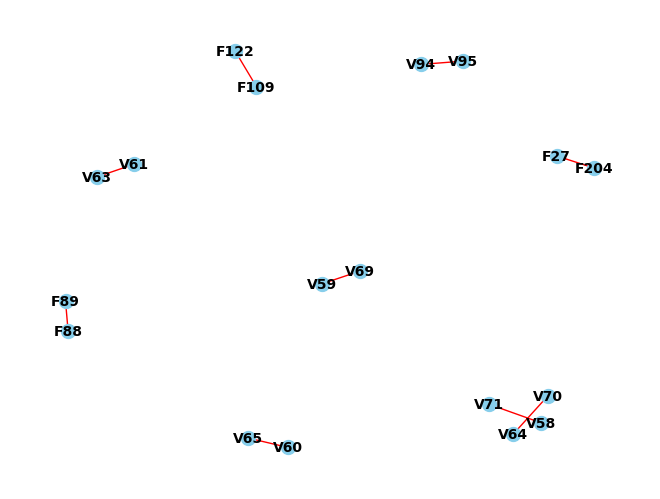

In [28]:
vectorizer = TfidfVectorizer(stop_words=list(stop_words))

tfidf_matrix = vectorizer.fit_transform(newsdf['Texto'])
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Establecer el umbral para altas simulitudes y construir la matriz de co-ocurrencia
threshold = 0.9
coocurrence_matrix = similarity_matrix > threshold

# Crear una lista de tuplas de los nodos conectados y los pesos correspondientes
edges = []
weights = []
node_names = list(newsdf['Key']) # obtener los nombres de los nodos a partir de la columna 'Nombre'

for i in range(coocurrence_matrix.shape[0]):
    for j in range(i+1, coocurrence_matrix.shape[1]):
        if coocurrence_matrix[i, j]:
            edges.append((node_names[i], node_names[j]))
            weights.append(similarity_matrix[i, j])

# Construir el grafo
G = nx.Graph()
G.add_edges_from(edges)

# Asignar los pesos a las conexiones
for i, (u, v) in enumerate(edges):
    G[u][v]['weight'] = weights[i]

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42, k=0.4)
nx.draw(G, pos, with_labels=True, node_size=100, edge_color='red', node_color = 'skyblue',width=weights, font_size=10, font_weight='bold')


filtramos las noticias repetidas

In [29]:
# valores a excluir por alta similitud
exclude_list = ['F122','F27', 'F88','V63','V94','V59','V64','V71','V60']
# excluir los valores de la lista en la columna 'Key'
newsdf = newsdf[~newsdf['Key'].isin(exclude_list)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


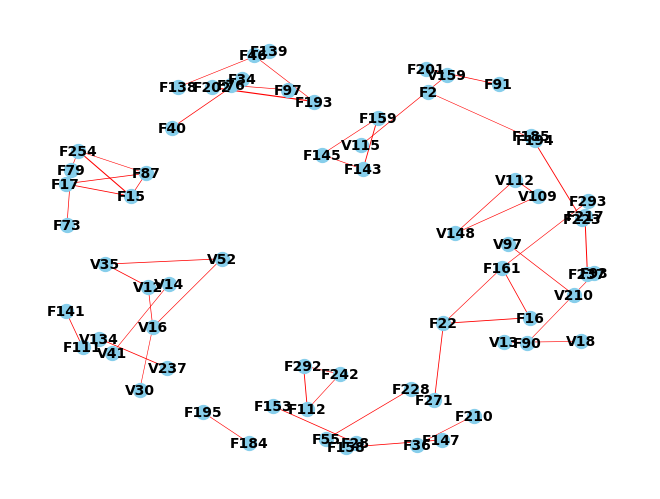

In [30]:
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
tfidf_matrix = vectorizer.fit_transform(newsdf['Texto'])

# Calcular la matriz de similitud coseno
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Establecer el umbral para altas simulitudes y construir la matriz de co-ocurrencia
threshold = 0.4
coocurrence_matrix = similarity_matrix > threshold

# Crear una lista de tuplas de los nodos conectados y los pesos correspondientes
edges = []
weights = []
node_names = list(newsdf['Key']) # obtener los nombres de los nodos a partir de la columna 'Nombre'

for i in range(coocurrence_matrix.shape[0]):
    for j in range(i+1, coocurrence_matrix.shape[1]):
        if coocurrence_matrix[i, j]:
            edges.append((node_names[i], node_names[j]))
            weights.append(similarity_matrix[i, j])

# Construir el grafo
G = nx.Graph()
G.add_edges_from(edges)

# Asignar los pesos a las conexiones
for i, (u, v) in enumerate(edges):
    G[u][v]['weight'] = weights[i]

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42, k=0.4)
nx.draw(G, pos, with_labels=True, node_size=100, edge_color='red', node_color = 'skyblue',width=weights, font_size=10, font_weight='bold')
#len(edges) # numero de nodos que se generan

In [31]:
# Vectorizar el texto
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
tfidf_matrix = vectorizer.fit_transform(newsdf['Texto'])

# Calcular la matriz de similitud coseno
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)


# Obtener los nombres de los archivos
node_names = newsdf['Archivo'].tolist()

# Construir el DataFrame de similitud
similarity_df = pd.DataFrame(similarity_matrix, columns=node_names, index=node_names)
similarity_df = similarity_df.stack().reset_index()
similarity_df.columns = ['nombre_texto_1', 'nombre_texto_2', 'similitud']
similarity_df = similarity_df[similarity_df.similitud < 0.999]

# filtrar comparativas iguales
similarity_df['Archivo_sorted'] = similarity_df.apply(lambda row: '_'.join(sorted([row['nombre_texto_1'], row['nombre_texto_2']])), axis=1)
similarity_df = similarity_df.drop_duplicates(subset='Archivo_sorted', keep='first')
similarity_df = similarity_df.drop(columns=['Archivo_sorted'])


# Mostrar el DataFrame de similitud
similarity_df.sort_values(by = 'similitud', ascending = False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nombre_texto_1  \
38574    76_F El bulo que dice que han aumentado un 5.txt   
7526    15_F Falso que vacuna contra COVID19 de AstraZ...   
121964  242_FAfirmaciones falsas sobre las vacunas y e...   
71379   143_F No existe un cronograma de cepas del nue...   
80365   161_F No hay evidencias de que a la reina de I...   
...                                                   ...   
12748   25_F Esta foto no es de manifestacion contra l...   
128828  255_FUsan FOTO VIEJA para senalar que Claudia ...   
170411  39_V Suiza prolonga ley de prevencion contra C...   
145491  287_FFALSO_No murio una persona en la via publ...   
14875   30_F Este video no prueba experimentacion con ...   

                                           nombre_texto_2  similitud  
38574   97_F Cuidado con el contenido que dice que ha ...   0.822796  
7526    254_FViruela del mono no es consecuencia de la...   0.749528  
121964  292_FLas afirmaciones falsas del video de Rica...   0.706759  
71379   145_F No es cierto que las variantes del COVID...   0.636240  
80365   293_FLa Reina Isabel no tomo ivermectina como ...   0.630233  
...                                                   ...        ...  
12748   276_FMicrosoft no esta enviando correos para e...   0.000000  
128828                                        106_VEE.txt   0.000000  
170411                88_VEl covid 19 no esta mutando.txt   0.000000  
145491  129_VCovid19 en escuelas_ que tan peligroso es...   0.000000  
14875   27_V Los sintomas de la COVID19 con las nuevas...   0.000000  

[134940 rows x 3 columns]

In [32]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# from scipy.cluster.hierarchy import dendrogram, linkage

# # Calcular similitud
# tfidf_matrix = TfidfVectorizer(stop_words=stop_words).fit_transform(newsdf["Texto"])
# similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # Hacer el clustering jerárquico
# Z = linkage(similarity_matrix, method='ward')

# # Hacer el dendrograma
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.set_title('Dendrograma de noticias')
# ax.set_xlabel('Noticias')
# ax.set_ylabel('Distancia')
# dendrogram(Z, labels=newsdf['Key'].values, orientation='top', leaf_font_size=10, color_threshold=3.0)
# plt.xticks(rotation=90)
# plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### LDA - Noticias falsas

In [33]:
# Crear una lista de tokens a partir de los textos de noticias
fake_texts = [news_text.split() for news_text in newsdf[newsdf.Tipo == "Falsa"]['Texto']]

# Eliminar las stopwords de cada texto

fake_texts = [[token for token in text if token not in stop_words] for text in fake_texts]
table = str.maketrans('', '', string.punctuation) # Eliminar de los tokens la puntuación parte 1
fake_texts = [[token.translate(table) for token in text] for text in fake_texts] # Eliminar de los tokens la puntuación parte 2
fake_texts = [[re.sub('[¡!¿?\\-»()[]«“”•"<>]“”‘\'’]', '', token) for token in text] for text in fake_texts] # Eliminar caracteres especiales parte 2
fake_texts = [[token.strip() for token in text] for text in fake_texts] # Eliminar tokens vacios parte 1
fake_texts = [[token for token in text if token != ''] for text in fake_texts] # Eliminar tokens vacios parte 2
fake_texts = [[token for token in text if not token.isdigit()] for text in fake_texts] # Eliminar tokens numericos

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Crear el diccionario a partir de los textos
fake_dictionary = corpora.Dictionary(fake_texts)

# Convertir los textos en el formato bag-of-words
corpus = [fake_dictionary.doc2bow(text) for text in fake_texts]

# Entrenar el modelo LDA con el corpus y el diccionario
lda_model_fake = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=fake_dictionary,
                                     num_topics=5, 
                                     random_state=42,
                                     update_every=1,
                                     chunksize=100,
                                     passes=10,
                                     alpha='auto',
                                     per_word_topics=True)

# Imprimir los tópicos y sus palabras más representativas
for idx, topic in lda_model_fake.print_topics(-1):
    print('Tópico: {} \n Palabras: {}'.format(idx, topic))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tópico: 0 
 Palabras: 0.014*"covid19" + 0.009*"coronavirus" + 0.008*"virus" + 0.007*"salud" + 0.005*"enfermedad" + 0.005*"puede" + 0.005*"oms" + 0.004*"pacientes" + 0.004*"uso" + 0.003*"personas"
Tópico: 1 
 Palabras: 0.008*"video" + 0.006*"covid19" + 0.004*"redes" + 0.003*"sociales" + 0.003*"falso" + 0.003*"vacunacion" + 0.003*"publicacion" + 0.003*"web" + 0.003*"articulo" + 0.002*"vacuna"
Tópico: 2 
 Palabras: 0.021*"vacunas" + 0.017*"covid19" + 0.016*"vacuna" + 0.007*"vacunacion" + 0.007*"personas" + 0.005*"pfizer" + 0.004*"dosis" + 0.004*"anos" + 0.004*"datos" + 0.004*"casos"
Tópico: 3 
 Palabras: 0.010*"covid19" + 0.007*"variante" + 0.007*"virus" + 0.005*"coronavirus" + 0.005*"oms" + 0.005*"video" + 0.005*"salud" + 0.004*"vacunacion" + 0.004*"variantes" + 0.004*"ivermectina"
Tópico: 4 
 Palabras: 0.017*"grafeno" + 0.008*"oxido" + 0.005*"viruela" + 0.005*"5g" + 0.004*"delgado" + 0.003*"mono" + 0.003*"covid19" + 0.003*"sarscov2" + 0.003*"coronavirus" + 0.003*"afp"


In [35]:
# Crear la visualización
vis_data = gensimvis.prepare(lda_model_fake, corpus, fake_dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


#### LDA - Noticias veridicas

In [36]:
# Crear una lista de tokens a partir de los textos de noticias
true_texts = [news_text.split() for news_text in newsdf[newsdf.Tipo == "Verdadera"]['Texto']]

# Eliminar las stopwords de cada texto

true_texts = [[token for token in text if token not in stop_words] for text in true_texts]
table = str.maketrans('', '', string.punctuation) # Eliminar de los tokens la puntuación parte 1
true_texts = [[token.translate(table) for token in text] for text in true_texts] # Eliminar de los tokens la puntuación parte 2
true_texts = [[re.sub('[¡!¿?\\-»()[]«“”•"<>]“”‘\'’]', '', token) for token in text] for text in true_texts] # Eliminar caracteres especiales parte 2
true_texts = [[token.strip() for token in text] for text in true_texts] # Eliminar tokens vacios parte 1
true_texts = [[token for token in text if token != ''] for text in true_texts] # Eliminar tokens vacios parte 2
true_texts = [[token for token in text if not token.isdigit()] for text in true_texts] # Eliminar tokens numericos

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Crear el diccionario a partir de los textos
true_dictionary = corpora.Dictionary(true_texts)

# Convertir los textos en el formato bag-of-words
corpus = [true_dictionary.doc2bow(text) for text in true_texts]

# Entrenar el modelo LDA con el corpus y el diccionario
lda_model_true = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=true_dictionary,
                                     num_topics=5, 
                                     random_state=42,
                                     update_every=1,
                                     chunksize=100,
                                     passes=10,
                                     alpha='auto',
                                     per_word_topics=True)

# Imprimir los tópicos y sus palabras más representativas
for idx, topic in lda_model_true.print_topics(-1):
    print('Tópico: {} \n Palabras: {}'.format(idx, topic))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tópico: 0 
 Palabras: 0.011*"covid19" + 0.010*"casos" + 0.010*"salud" + 0.008*"pais" + 0.006*"pandemia" + 0.006*"ciento" + 0.005*"dias" + 0.005*"personas" + 0.005*"muertes" + 0.004*"contagios"
Tópico: 1 
 Palabras: 0.016*"vacuna" + 0.011*"vacunas" + 0.010*"covid19" + 0.006*"dosis" + 0.006*"salud" + 0.006*"paises" + 0.005*"pais" + 0.005*"millones" + 0.004*"pandemia" + 0.004*"ministerio"
Tópico: 2 
 Palabras: 0.014*"salud" + 0.013*"eps" + 0.004*"muestras" + 0.004*"proceso" + 0.004*"hogar" + 0.004*"covid19" + 0.004*"geriatrico" + 0.004*"resultados" + 0.003*"procuraduria" + 0.003*"pruebas"
Tópico: 3 
 Palabras: 0.005*"piel" + 0.005*"china" + 0.004*"bolt" + 0.004*"coronavirus" + 0.004*"covid19" + 0.004*"medico" + 0.004*"yi" + 0.003*"dijo" + 0.003*"covid" + 0.003*"casa"
Tópico: 4 
 Palabras: 0.011*"virus" + 0.009*"covid19" + 0.008*"vacuna" + 0.008*"coronavirus" + 0.005*"personas" + 0.005*"anticuerpos" + 0.005*"dos" + 0.005*"estudio" + 0.004*"puede" + 0.004*"sarscov2"


In [38]:
# Crear la visualización
vis_data = gensimvis.prepare(lda_model_true, corpus, true_dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


#### Analisis de variables cuantitativas

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


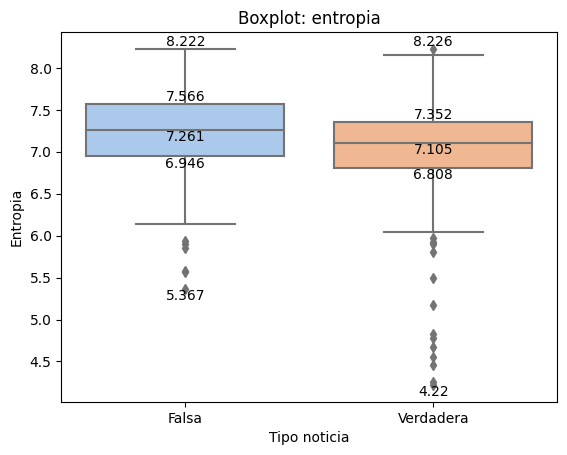

In [39]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'Entropia', title = "Boxplot: entropia", xlabel = "Tipo noticia", ylabel = "Entropia")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


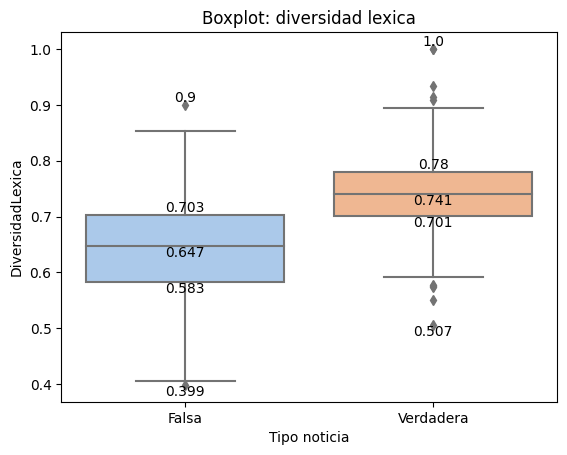

In [40]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'DiversidadLexica', title = "Boxplot: diversidad lexica", xlabel = "Tipo noticia", ylabel = "DiversidadLexica")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


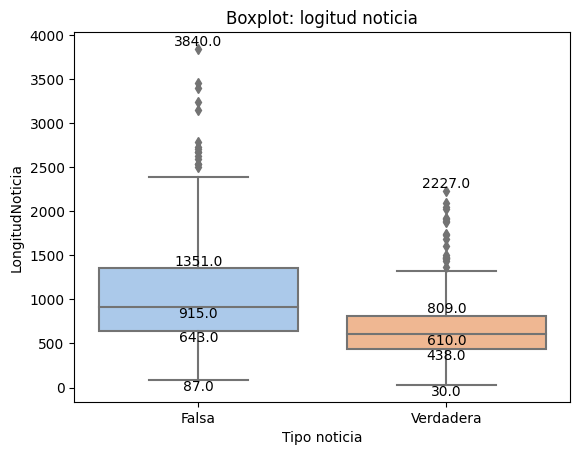

In [41]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'LongitudNoticia', title = "Boxplot: logitud noticia", xlabel = "Tipo noticia", ylabel = "LongitudNoticia")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


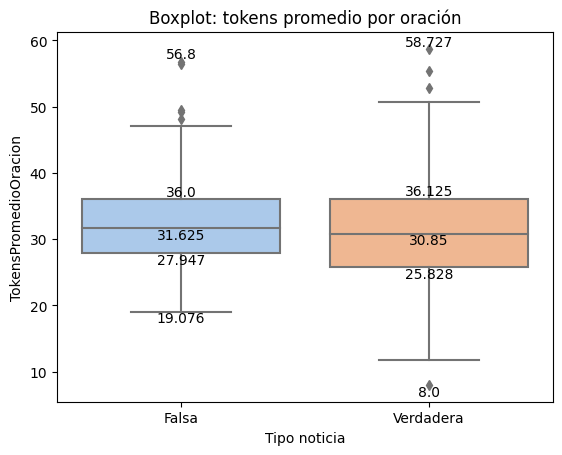

In [42]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'TokensPromedioOracion', title = "Boxplot: tokens promedio por oración", xlabel = "Tipo noticia", ylabel = "TokensPromedioOracion")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


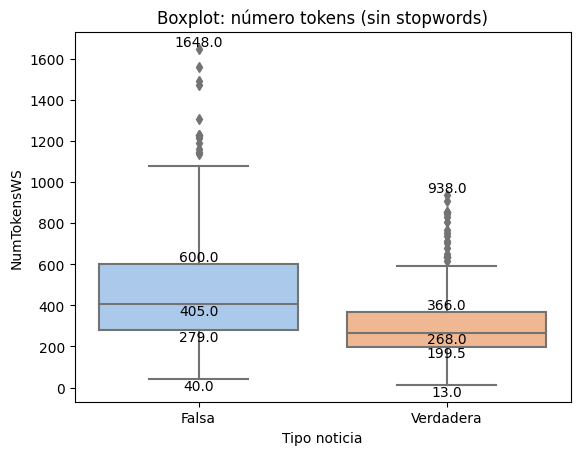

In [43]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'NumTokensWS', title = "Boxplot: número tokens (sin stopwords)", xlabel = "Tipo noticia", ylabel = "NumTokensWS")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


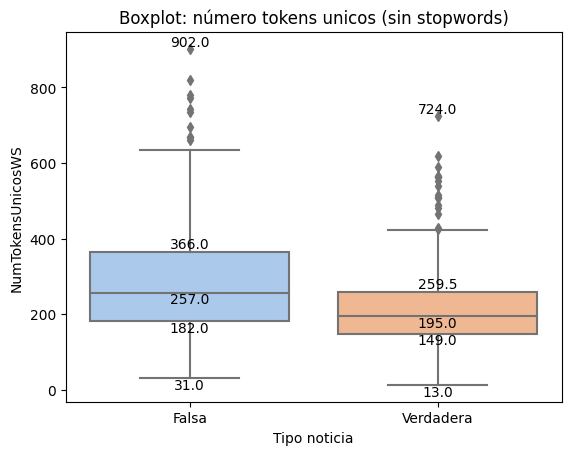

In [44]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'NumTokensUnicosWS', title = "Boxplot: número tokens unicos (sin stopwords)", xlabel = "Tipo noticia", ylabel = "NumTokensUnicosWS")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


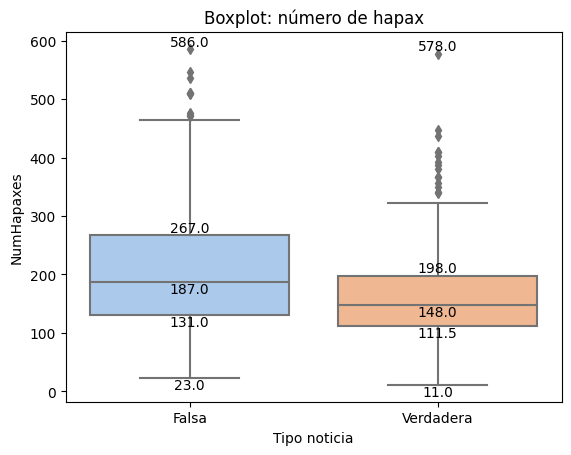

In [45]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'NumHapaxes', title = "Boxplot: número de hapax", xlabel = "Tipo noticia", ylabel = "NumHapaxes")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


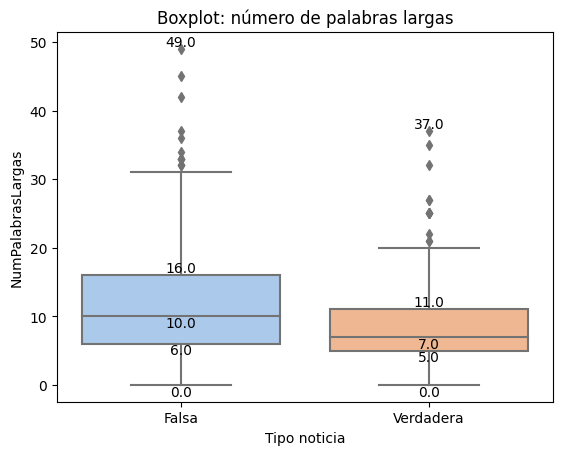

In [46]:
generate_categorical_boxplot(df = newsdf, categorical_col= 'Tipo', numerical_col = 'NumPalabrasLargas', title = "Boxplot: número de palabras largas", xlabel = "Tipo noticia", ylabel = "NumPalabrasLargas")

### Nube palabras: hapaxes

In [47]:
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Agrupar noticias por tipo
grouped = newsdf.groupby('Tipo')

# Crear diccionario con hapax por tipo de noticia
hapax_dict = {}
for name, group in grouped:
    hapax_list = [word for hapaxes in group['Hapaxes'] for word in hapaxes]
    hapax_dict[name] = dict(collections.Counter(hapax_list))

# Crear bag of words por tipo de noticia
bag_of_words_dict = {}
for name, hapax_counts in hapax_dict.items():
    bag_of_words_dict[name] = sorted(hapax_counts.items(), key=lambda x: x[1], reverse=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


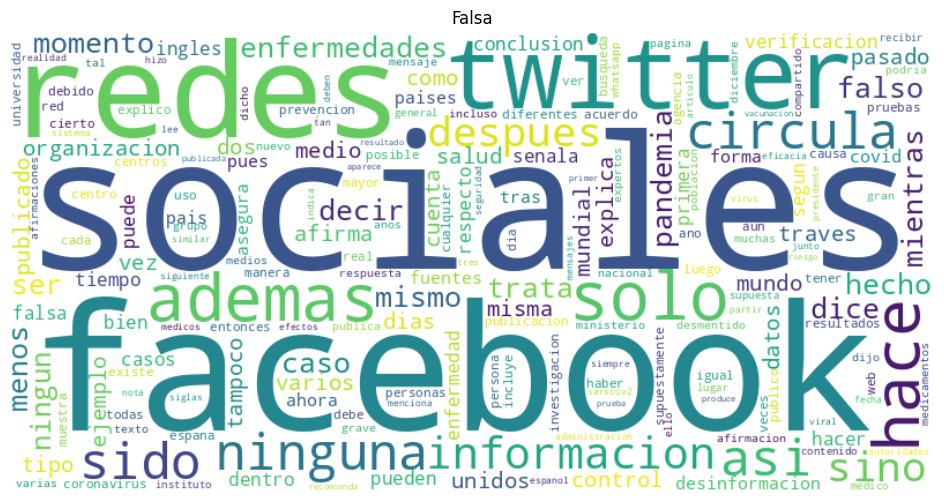

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


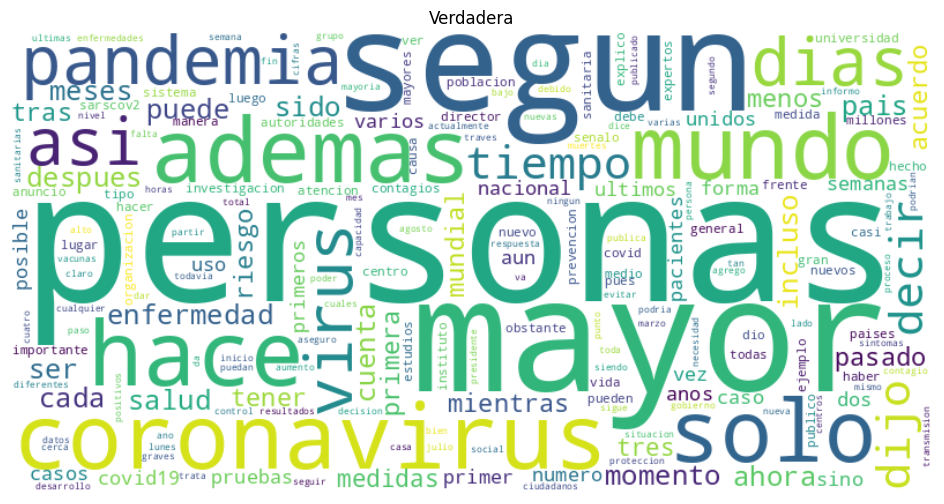

In [49]:
# Generar nube de palabras para cada tipo de noticia
for name, bag_of_words in bag_of_words_dict.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(bag_of_words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(name)
    plt.show()

### Nube palabras: palabras mas comunes

In [50]:
# Agrupar noticias por tipo
grouped = newsdf.groupby('Tipo')

# Crear diccionario con hapax por tipo de noticia
fq_dict = {}
for name, group in grouped:
    fq_list = [word for tokensfq in group['TokensMayorFrecuencia'] for word in tokensfq]
    fq_dict[name] = dict(collections.Counter(fq_list))

# Crear bag of words por tipo de noticia
bag_of_words_dict = {}
for name, fq_counts in fq_dict.items():
    bag_of_words_dict[name] = sorted(fq_counts.items(), key=lambda x: x[1], reverse=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


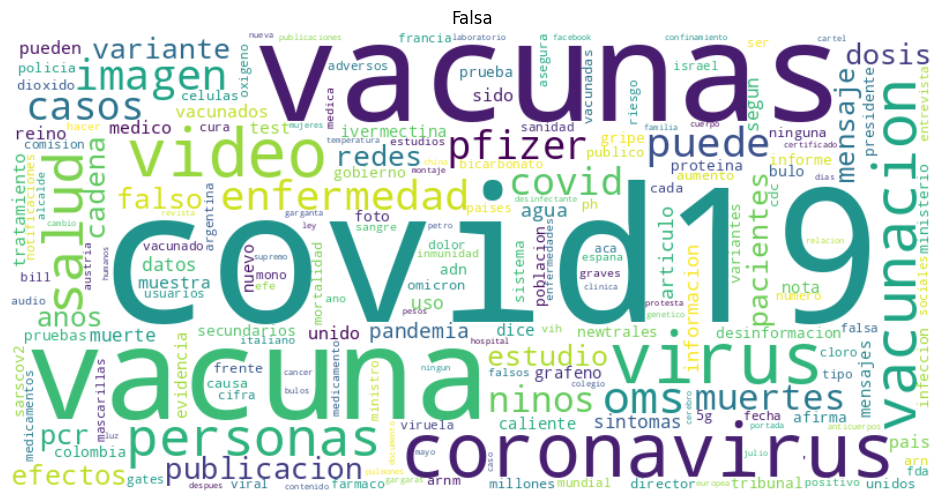

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


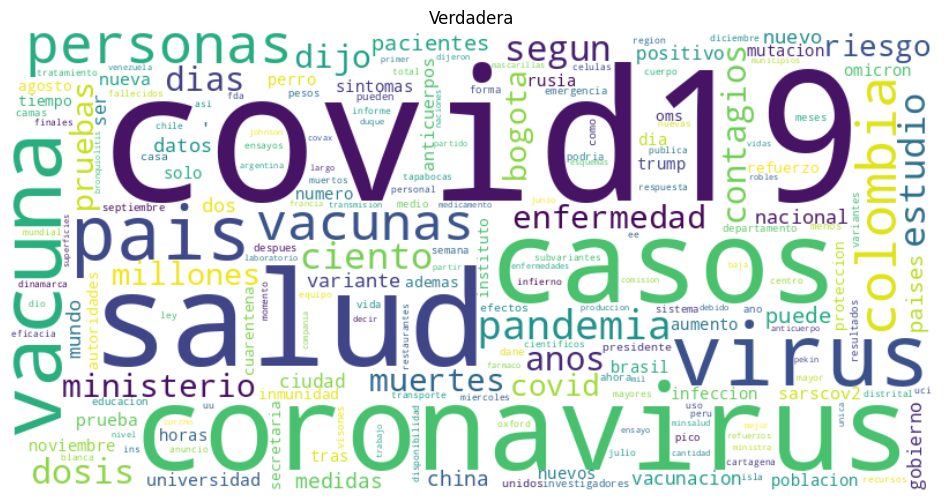

In [51]:
# Generar nube de palabras para cada tipo de noticia
for name, bag_of_words in bag_of_words_dict.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(bag_of_words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(name)
    plt.show()

### Nube de palabras: palabras mas largas

In [52]:
# Agrupar noticias por tipo
grouped = newsdf.groupby('Tipo')

# Crear diccionario con hapax por tipo de noticia
len_dict = {}
for name, group in grouped:
    len_list = [word for len_tokens in group['PalabrasLargas'] for word in len_tokens]
    len_dict[name] = dict(collections.Counter(len_list))

# Crear bag of words por tipo de noticia
bag_of_words_dict = {}
for name, len_counts in len_dict.items():
    bag_of_words_dict[name] = sorted(len_counts.items(), key=lambda x: x[1], reverse=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


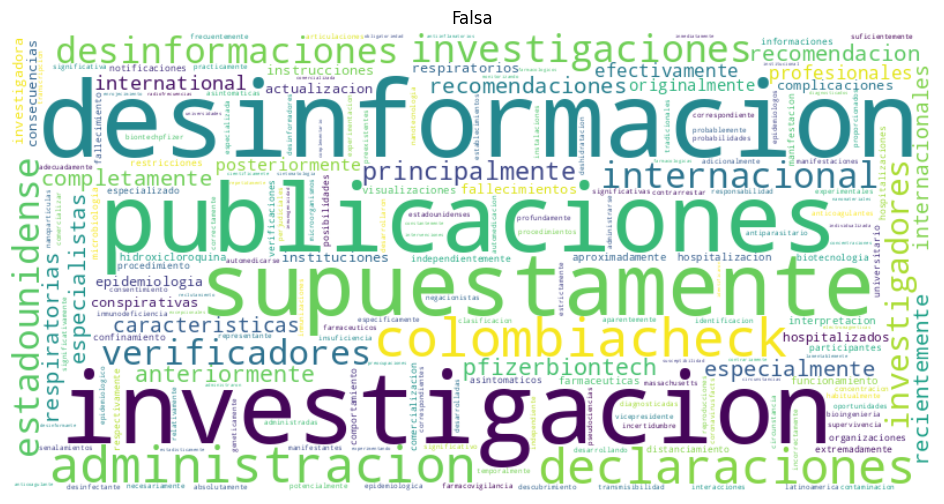

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


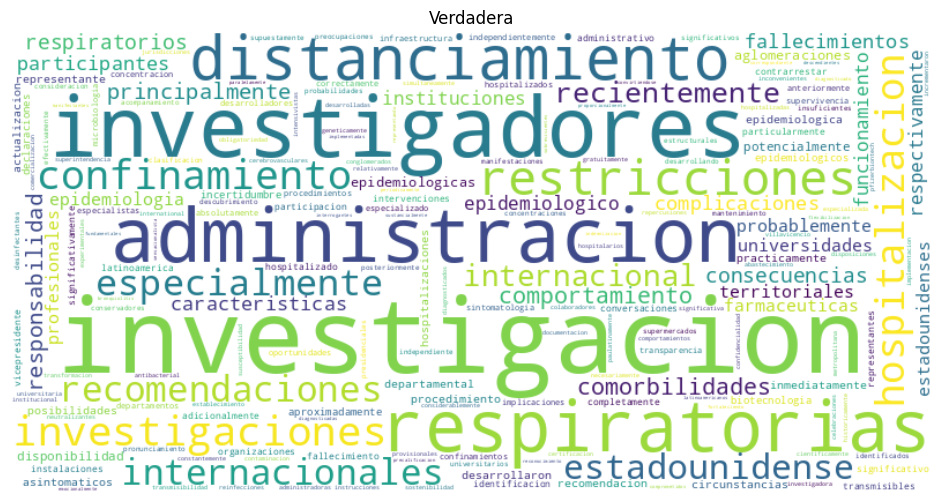

In [53]:
# Generar nube de palabras para cada tipo de noticia
for name, bag_of_words in bag_of_words_dict.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(bag_of_words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(name)
    plt.show()

# Procesamiento

### Procesamiento fakenews

In [54]:
fake_docs_clean = []
fake_vocabulary = []
for nameText in fake_news:
  fake_docs_clean.append({'archivo': nameText, 'tokens': tf_idf_prep(textCorpus = fakeCorpus, nameText = nameText ,stemmer = 'ss')}) 
  fake_vocabulary +=  tf_idf_prep(textCorpus = fakeCorpus, nameText = nameText ,stemmer = 'ss')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Identificación de la frecuencia de las palabras utilizadas en las noticias falsas del dataset.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


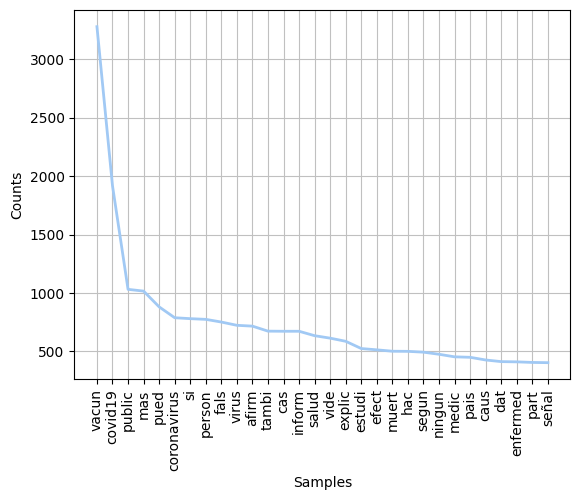

In [55]:
tokens_all_fake = []

for t in fake_docs_clean:
  tokens_all_fake += t['tokens']

freq_dist = FreqDist(tokens_all_fake)
freq_dist.plot(30, cumulative=False)
plt.show()

Calculamos la medida de diversidad lexica para cada una de las noticias falsas del conjunto de datos, junto con la media y la desviación estandar de la metrica.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


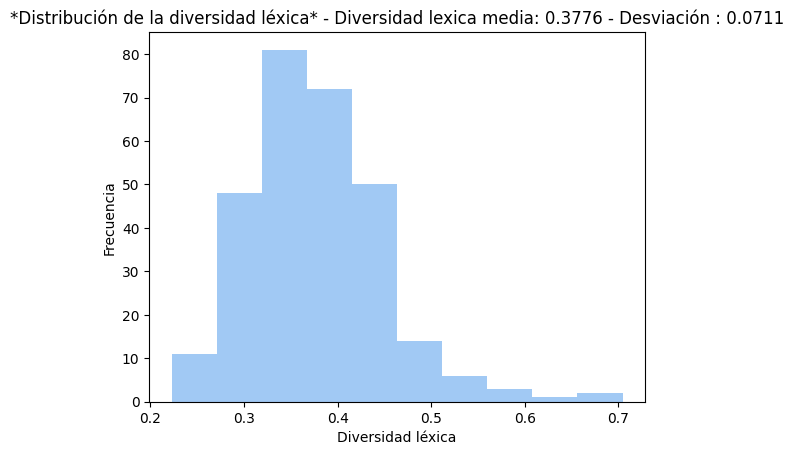

In [56]:
plot_lexical_diversity_dist(docs=fake_docs_raw)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


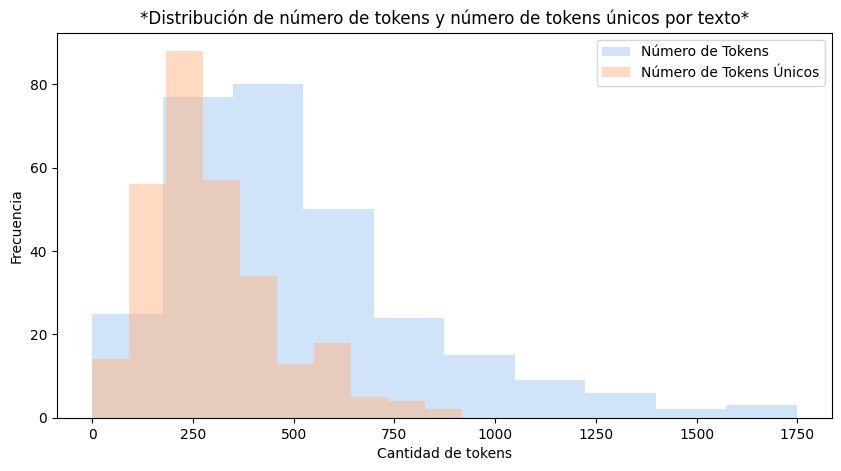

In [57]:
plot_tokens_text(docs=fake_docs_raw)

### Procesamiento noticias veridicas

In [58]:
true_docs_clean = []
true_vocabulary = []
for nameText in true_news:
  true_docs_clean.append({'archivo': nameText, 'tokens': tf_idf_prep(textCorpus = trueCorpus, nameText = nameText ,stemmer = 'ss')})
  true_vocabulary +=  tf_idf_prep(textCorpus = trueCorpus, nameText = nameText ,stemmer = 'ss')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Identificación de la frecuencia de las palabras utilizadas en las noticias veridicas del dataset.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


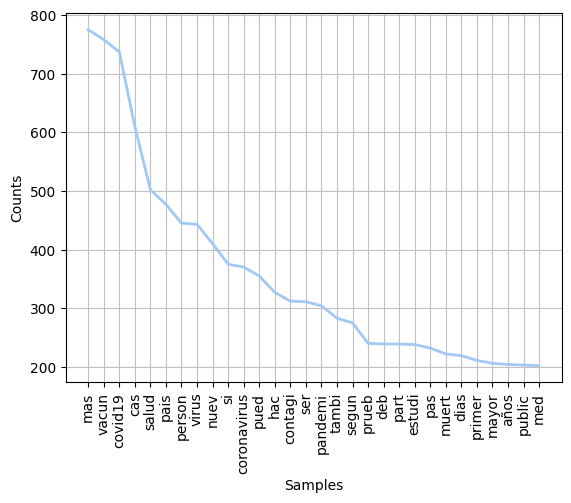

In [59]:
tokens_all_true = []

for t in true_docs_clean:
  tokens_all_true += t['tokens']

freq_dist = FreqDist(tokens_all_true)
freq_dist.plot(30, cumulative=False)
plt.show()

Calculamos la medida de diversidad lexica para cada una de las noticias vericas del conjunto de datos, junto con la media y la desviación estandar de la metrica. 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


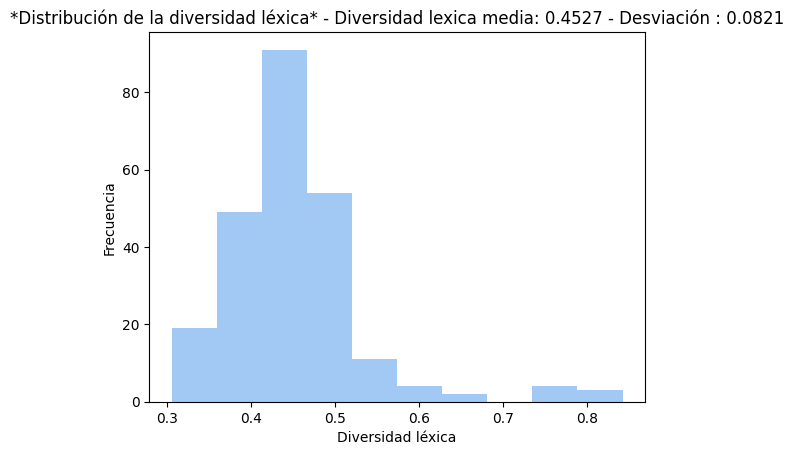

In [60]:
plot_lexical_diversity_dist(docs=true_docs_raw)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


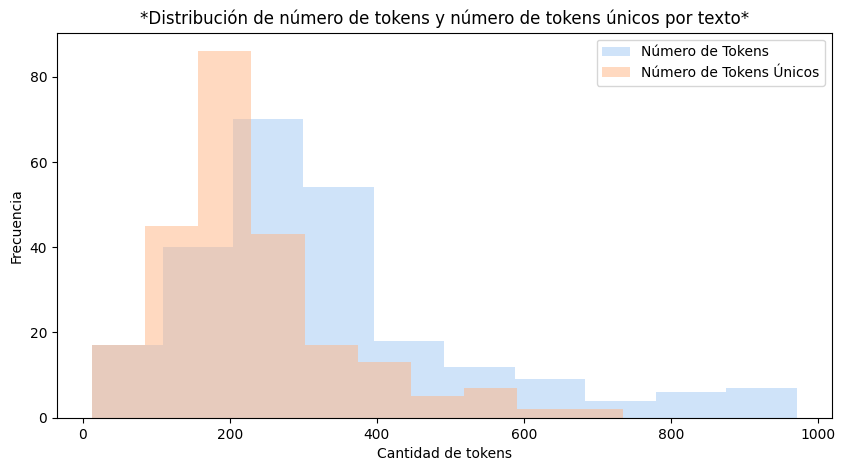

In [61]:
plot_tokens_text(docs=true_docs_raw)

# Modelo

In [132]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
features = ["Entropia", "DiversidadLexica", "LongitudNoticia", "TokensPromedioOracion",
            "NumTokensWS", "NumTokensUnicosWS", "NumHapaxes", "NumPalabrasLargas"]
target = "Tipo"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Regresión logistica

In [117]:
X = newsdf[features]
y = newsdf[target].apply(lambda x: 1 if x == "Verdadera" else 0)  # Codifica la variable objetivo como 1 y 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste del modelo y resumen estadístico
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449795
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   Tipo   No. Observations:                  416
Model:                          Logit   Df Residuals:                      407
Method:                           MLE   Df Model:                            8
Date:                Sun, 09 Apr 2023   Pseudo R-squ.:                  0.3463
Time:                        05:53:57   Log-Likelihood:                -187.11
converged:                       True   LL-Null:                       -286.23
Covariance Type:            nonrobust   LLR p-value:                 1.514e-38
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -13.2838      5.667     -2.344      0.019     -24.390      -2.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
# Matriz de confusión
X_test = sm.add_constant(X_test)
y_pred = (result.predict(X_test) >= 0.5).astype(int)  # Predice usando el umbral 0.5
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)


Matriz de confusión:
 [[40 20]
 [10 34]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


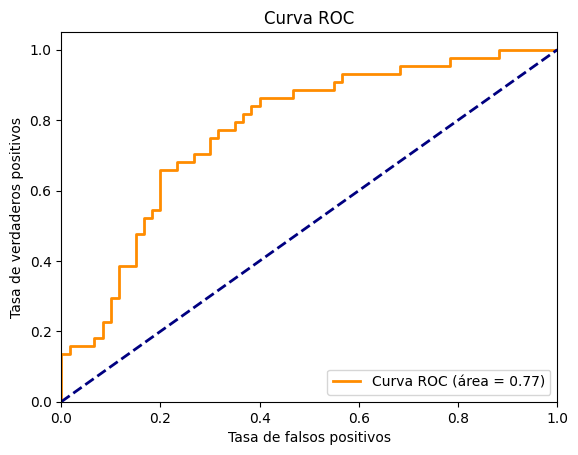

In [119]:
# Curva ROC
y_probs = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Suppor vector machine

In [120]:
X = newsdf[features]
y = newsdf[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
# Ajuste del modelo
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True, random_state=42))
svm_classifier.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [122]:
# Matriz de confusión
y_pred = svm_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[41 19]
 [16 28]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


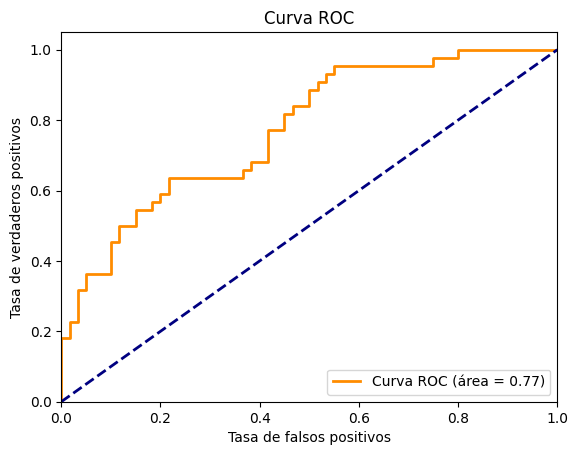

In [123]:
# Curva ROC
y_probs = svm_classifier.predict_proba(X_test)[:, 1]  # Probabilidad de la clase "Verdadera"
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label="Verdadera")
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Xgboost

In [128]:
X = newsdf[features]
y = newsdf[target].apply(lambda x: 1 if x == "Verdadera" else 0)  # Codifica la variable objetivo como 1 y 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
# Ajuste del modelo
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [130]:
# Matriz de confusión
y_pred = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)


Matriz de confusión:
 [[44 16]
 [16 28]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


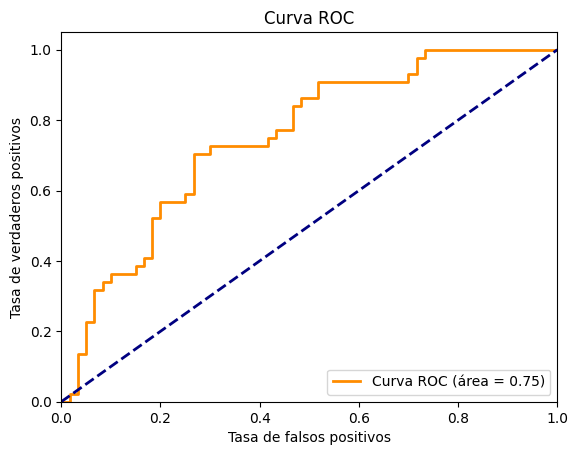

In [131]:
# Curva ROC
y_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Probabilidad de la clase "Verdadera"
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Randomforest

In [133]:
X = newsdf[features]
y = newsdf[target].apply(lambda x: 1 if x == "Verdadera" else 0)  # Codifica la variable objetivo como 1 y 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
# Ajuste del modelo
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(random_state=42)

In [135]:
# Matriz de confusión
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[42 18]
 [18 26]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


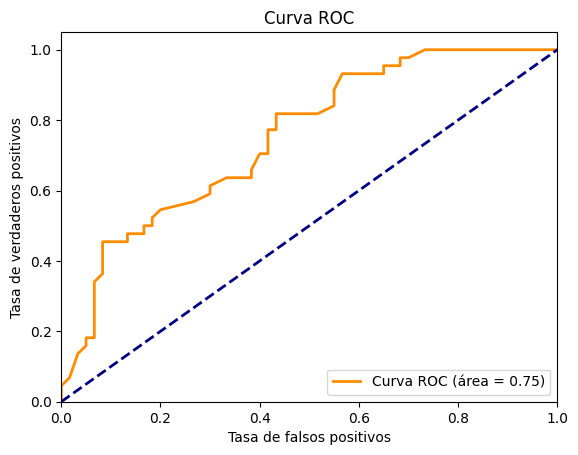

In [137]:
# Curva ROC
y_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilidad de la clase "Verdadera"
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Redes neuronales convolucionales

In [138]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
# Preparación de los datos
X = newsdf['Texto']
y = newsdf['Tipo']

# Codifica la variable objetivo como 0 y 1
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Tokeniza y crea secuencias de texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index

# Ajusta la longitud de las secuencias
max_length = max([len(s) for s in sequences])
data = pad_sequences(sequences, maxlen=max_length)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
# Ajuste del modelo
embedding_dim = 100
vocab_size = len(word_index) + 1
num_filters = 32
kernel_size = 3

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(num_filters, kernel_size, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
12/12 - 11s - loss: 0.6929 - accuracy: 0.4947 - val_loss: 0.6887 - val_accuracy: 0.6905 - 11s/epoch - 957ms/step
Epoch 2/10
12/12 - 4s - loss: 0.6741 - accuracy: 0.6471 - val_loss: 0.6798 - val_accuracy: 0.6667 - 4s/epoch - 311ms/step
Epoch 3/10
12/12 - 4s - loss: 0.6515 - accuracy: 0.7406 - val_loss: 0.6715 - val_accuracy: 0.6190 - 4s/epoch - 306ms/step
Epoch 4/10
12/12 - 7s - loss: 0.6242 - accuracy: 0.8262 - val_loss: 0.6587 - val_accuracy: 0.6667 - 7s/epoch - 606ms/step
Epoch 5/10
12/12 - 4s - loss: 0.5913 - accuracy: 0.8342 - val_loss: 0.6437 - val_accuracy: 0.7143 - 4s/epoch - 310ms/step
Epoch 6/10
12/12 - 4s - loss: 0.5527 - accuracy: 0.9064 - val_loss: 0.6325 - val_accuracy: 0.5952 - 4s/epoch - 362ms/step
Epoch 7/10
12/12 - 8s - loss: 0.5125 - accuracy: 0.8850 - val_loss: 0.6107 - val_accuracy: 0.7143 - 8s/epoch - 640ms/step
Epoch 8/10
12/12 - 6s - loss: 0.4725 - accuracy: 0.9492 - val_loss: 0.6055 - val_accuracy: 0.6667 - 6s/epoch - 536ms/step
Epoch 9/10
12/12 - 6s 

In [142]:
# Matriz de confusión
y_pred = model.predict(X_test).round().flatten().astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4/4 [==============================] - 1s 132ms/step
Matriz de confusión:
 [[44 16]
 [ 0 44]]


1/4 [======>.......................] - ETA: 0s

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4/4 [==============================] - 0s 51ms/step


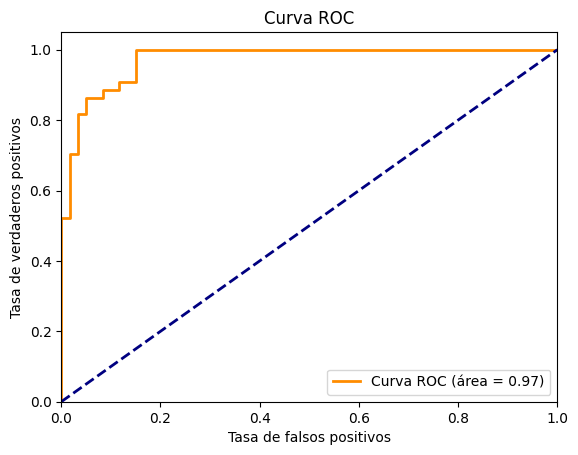

In [143]:
# Curva ROC
y_probs = model.predict(X_test).flatten()  # Probabilidad de la clase "Verdadera"
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Redes neuronales recurrente

In [144]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
# Preparación de los datos
X = newsdf['Texto']
y = newsdf['Tipo']

# Codifica la variable objetivo como 0 y 1
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Tokeniza y crea secuencias de texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index

# Ajusta la longitud de las secuencias
max_length = max([len(s) for s in sequences])
data = pad_sequences(sequences, maxlen=max_length)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
# Ajuste del modelo
embedding_dim = 100
vocab_size = len(word_index) + 1
lstm_units = 64

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(lstm_units),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
12/12 - 59s - loss: 0.6927 - accuracy: 0.5107 - val_loss: 0.6910 - val_accuracy: 0.5476 - 59s/epoch - 5s/step
Epoch 2/10
12/12 - 45s - loss: 0.6834 - accuracy: 0.5535 - val_loss: 0.6823 - val_accuracy: 0.5476 - 45s/epoch - 4s/step
Epoch 3/10
12/12 - 44s - loss: 0.6076 - accuracy: 0.6551 - val_loss: 0.5674 - val_accuracy: 0.5952 - 44s/epoch - 4s/step
Epoch 4/10
12/12 - 46s - loss: 0.4663 - accuracy: 0.9305 - val_loss: 0.6385 - val_accuracy: 0.7143 - 46s/epoch - 4s/step
Epoch 5/10
12/12 - 44s - loss: 0.4102 - accuracy: 0.9679 - val_loss: 0.4808 - val_accuracy: 0.8571 - 44s/epoch - 4s/step
Epoch 6/10
12/12 - 44s - loss: 0.1719 - accuracy: 0.9840 - val_loss: 0.2685 - val_accuracy: 0.9286 - 44s/epoch - 4s/step
Epoch 7/10
12/12 - 44s - loss: 0.0767 - accuracy: 0.9813 - val_loss: 0.5986 - val_accuracy: 0.8333 - 44s/epoch - 4s/step
Epoch 8/10
12/12 - 44s - loss: 0.0453 - accuracy: 0.9920 - val_loss: 0.5161 - val_accuracy: 0.8095 - 44s/epoch - 4s/step
Epoch 9/10
12/12 - 44s - loss: 0

In [147]:
# Matriz de confusión
y_pred = model.predict(X_test).round().flatten().astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4/4 [==============================] - 2s 420ms/step
Matriz de confusión:
 [[52  8]
 [ 9 35]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4/4 [==============================] - 3s 647ms/step


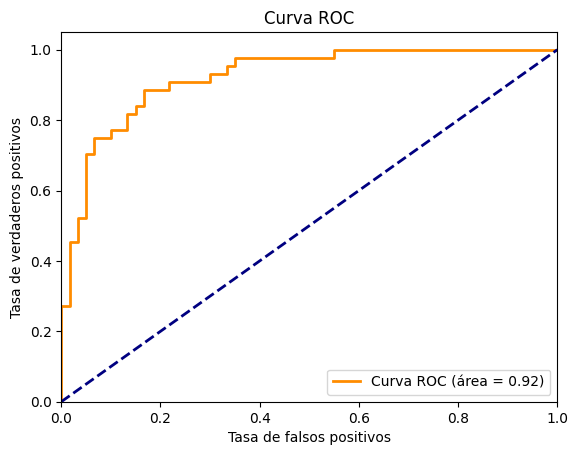

In [148]:
# Curva ROC
y_probs = model.predict(X_test).flatten()  # Probabilidad de la clase "Verdadera"
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (área = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [62]:
# docs_token_clean = true_docs_clean + fake_docs_clean
# print("Total noticias:" , len(docs_token_clean), "\n",
#       "Noticias veridicas:" , len(true_docs_clean), "\n",
#  6     "Noticias falsas:", len(fake_docs_clean))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
# cdf = nltk.ConditionalFreqDist()
# for num_doc in docs_token_clean:
#   #print(num_doc)
#   condition = num_doc['archivo']
#   for word in num_doc['tokens']:
#     cdf[condition][word] += 1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# df_fdist = pd.DataFrame.from_dict(cdf, orient='index').fillna(0)
# tf = df_fdist.divide(np.sum(df_fdist, axis=1), axis=0)
# idf = np.log10(len(tf) / df_fdist[df_fdist > 0].count()) 
# tfidf = np.multiply(tf, idf.to_frame().T)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# tfidf.sort_values(by = 'index', ascending = True)
# tfidf

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# similit=[]
# idx = tfidf .index.tolist()
# for iname in idx:
#   for jname in idx:
#     if iname != jname:
#       sim=cosine_similarity(tfidf.loc[[iname]].values[0], tfidf.loc[[jname]].values[0])
#       similit.append({'Archivo 1': iname,'Archivo 2':jname,'Similitud': sim})



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# similitud = pd.DataFrame(similit)
# similitud = similitud.sort_values(by = 'Similitud', ascending = False)
# similitud = similitud[similitud["Similitud"] < 0.9999]
# similitud

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
